# Customer Profiling and Segmentation Analysis
## Overview
This notebook performs customer segmentation analysis using behavioral and demographic data. The analysis helps identify distinct user groups for targeted marketing strategies.

### Objectives:
1. Analyze user behavior patterns
2. Identify distinct customer segments
3. Create detailed profiles for each segment
4. Visualize segment characteristics

In [1]:
# Import required libraries
import pandas as pd              # For data manipulation and analysis
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns           # For enhanced visualizations
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.cluster import KMeans               # For clustering algorithm

## Data Loading and Initial Exploration
The dataset contains user behavioral metrics and demographic information including:
- Online activity patterns
- Engagement metrics (likes, CTR)
- Demographic details (age, gender, location)
- Device usage and preferences

In [2]:
# Load and Preview Data
data = pd.read_csv('user_profiles_for_ads.csv')
print("Dataset Shape:", data.shape)
print("\nSample Data:")
data.sample(3)

Dataset Shape: (1000, 16)

Sample Data:


,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
641,642,25-34,Male,Suburban,Spanish,Master,716,112,Desktop Only,0.7,5.1,0.229,0.057,71,80k-100k,"Digital Marketing, Reading and Literature, Gou..."
951,952,45-54,Male,Rural,Spanish,PhD,6827,337,Mobile + Desktop,3.9,1.8,0.225,0.058,18,100k+,"Investing and Finance, Gourmet Cooking, Travel..."
692,693,35-44,Male,Urban,English,Technical,2983,154,Mobile Only,1.9,4.0,0.106,0.022,19,20k-40k,"Data Science, Gourmet Cooking"


In [3]:
# Data Info and Initial Analysis
print("Dataset Information:")
data.info()
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  

## Exploratory Data Analysis

/tmp/ipykernel_766457/2946912450.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x='Age', data=data, palette='coolwarm')
/tmp/ipykernel_766457/2946912450.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], x='Gender', data=data, palette='coolwarm')
/tmp/ipykernel_766457/2946912450.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1, 0], x='Education Level', data=data, palette='coolwarm')
/tmp/ipykernel_766457/2946912450.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is de

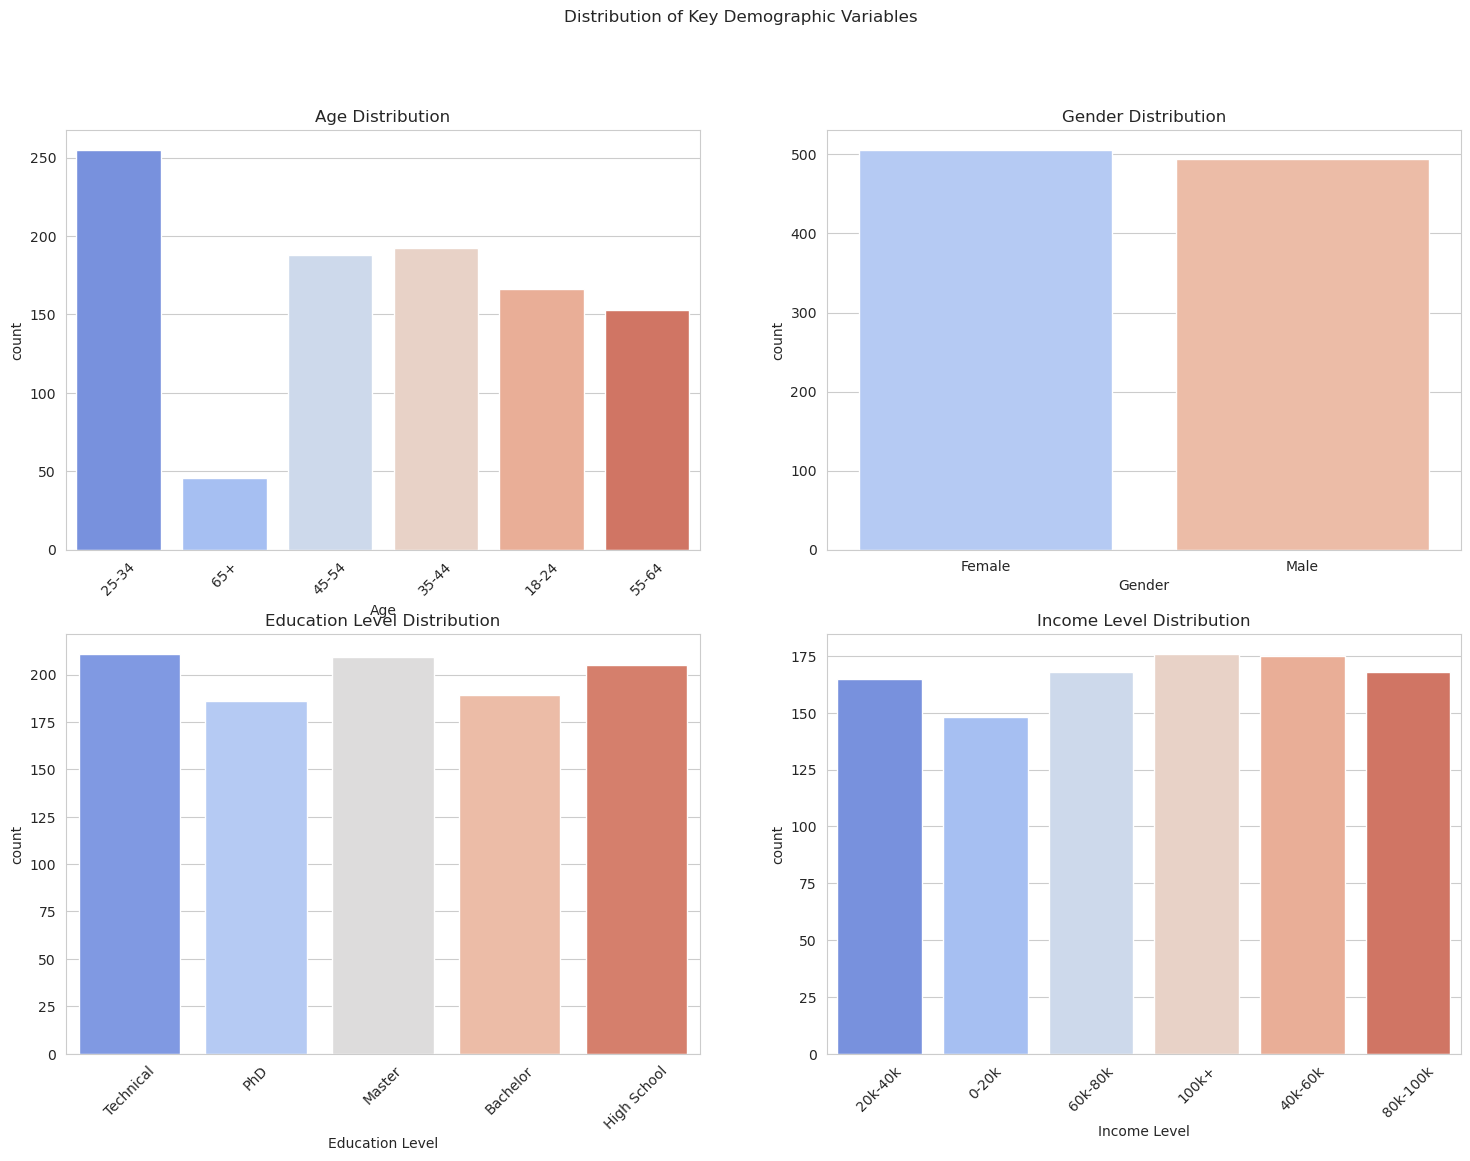

In [4]:
# setting the aesthetic style of the plots
sns.set_style("whitegrid")

# creating subplots for the demographic distributions
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Demographic Variables')

# age distribution
sns.countplot(ax=axes[0, 0], x='Age', data=data, palette='coolwarm')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# gender distribution
sns.countplot(ax=axes[0, 1], x='Gender', data=data, palette='coolwarm')
axes[0, 1].set_title('Gender Distribution')

# education level distribution
sns.countplot(ax=axes[1, 0], x='Education Level', data=data, palette='coolwarm')
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# income level distribution
sns.countplot(ax=axes[1, 1], x='Income Level', data=data, palette='coolwarm')
axes[1, 1].set_title('Income Level Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

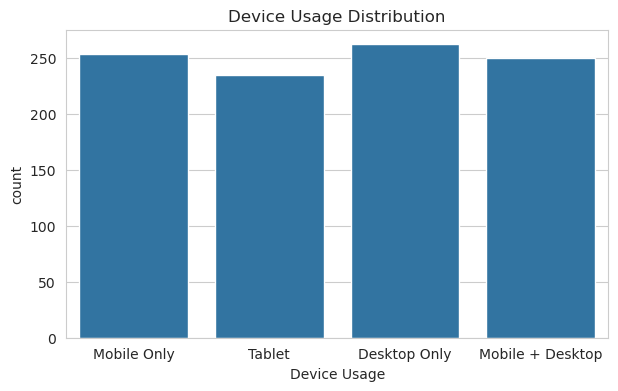

In [5]:
# device usage distribution
plt.figure(figsize=(7, 4))
sns.countplot(x='Device Usage', data=data)
plt.title('Device Usage Distribution')
plt.show()

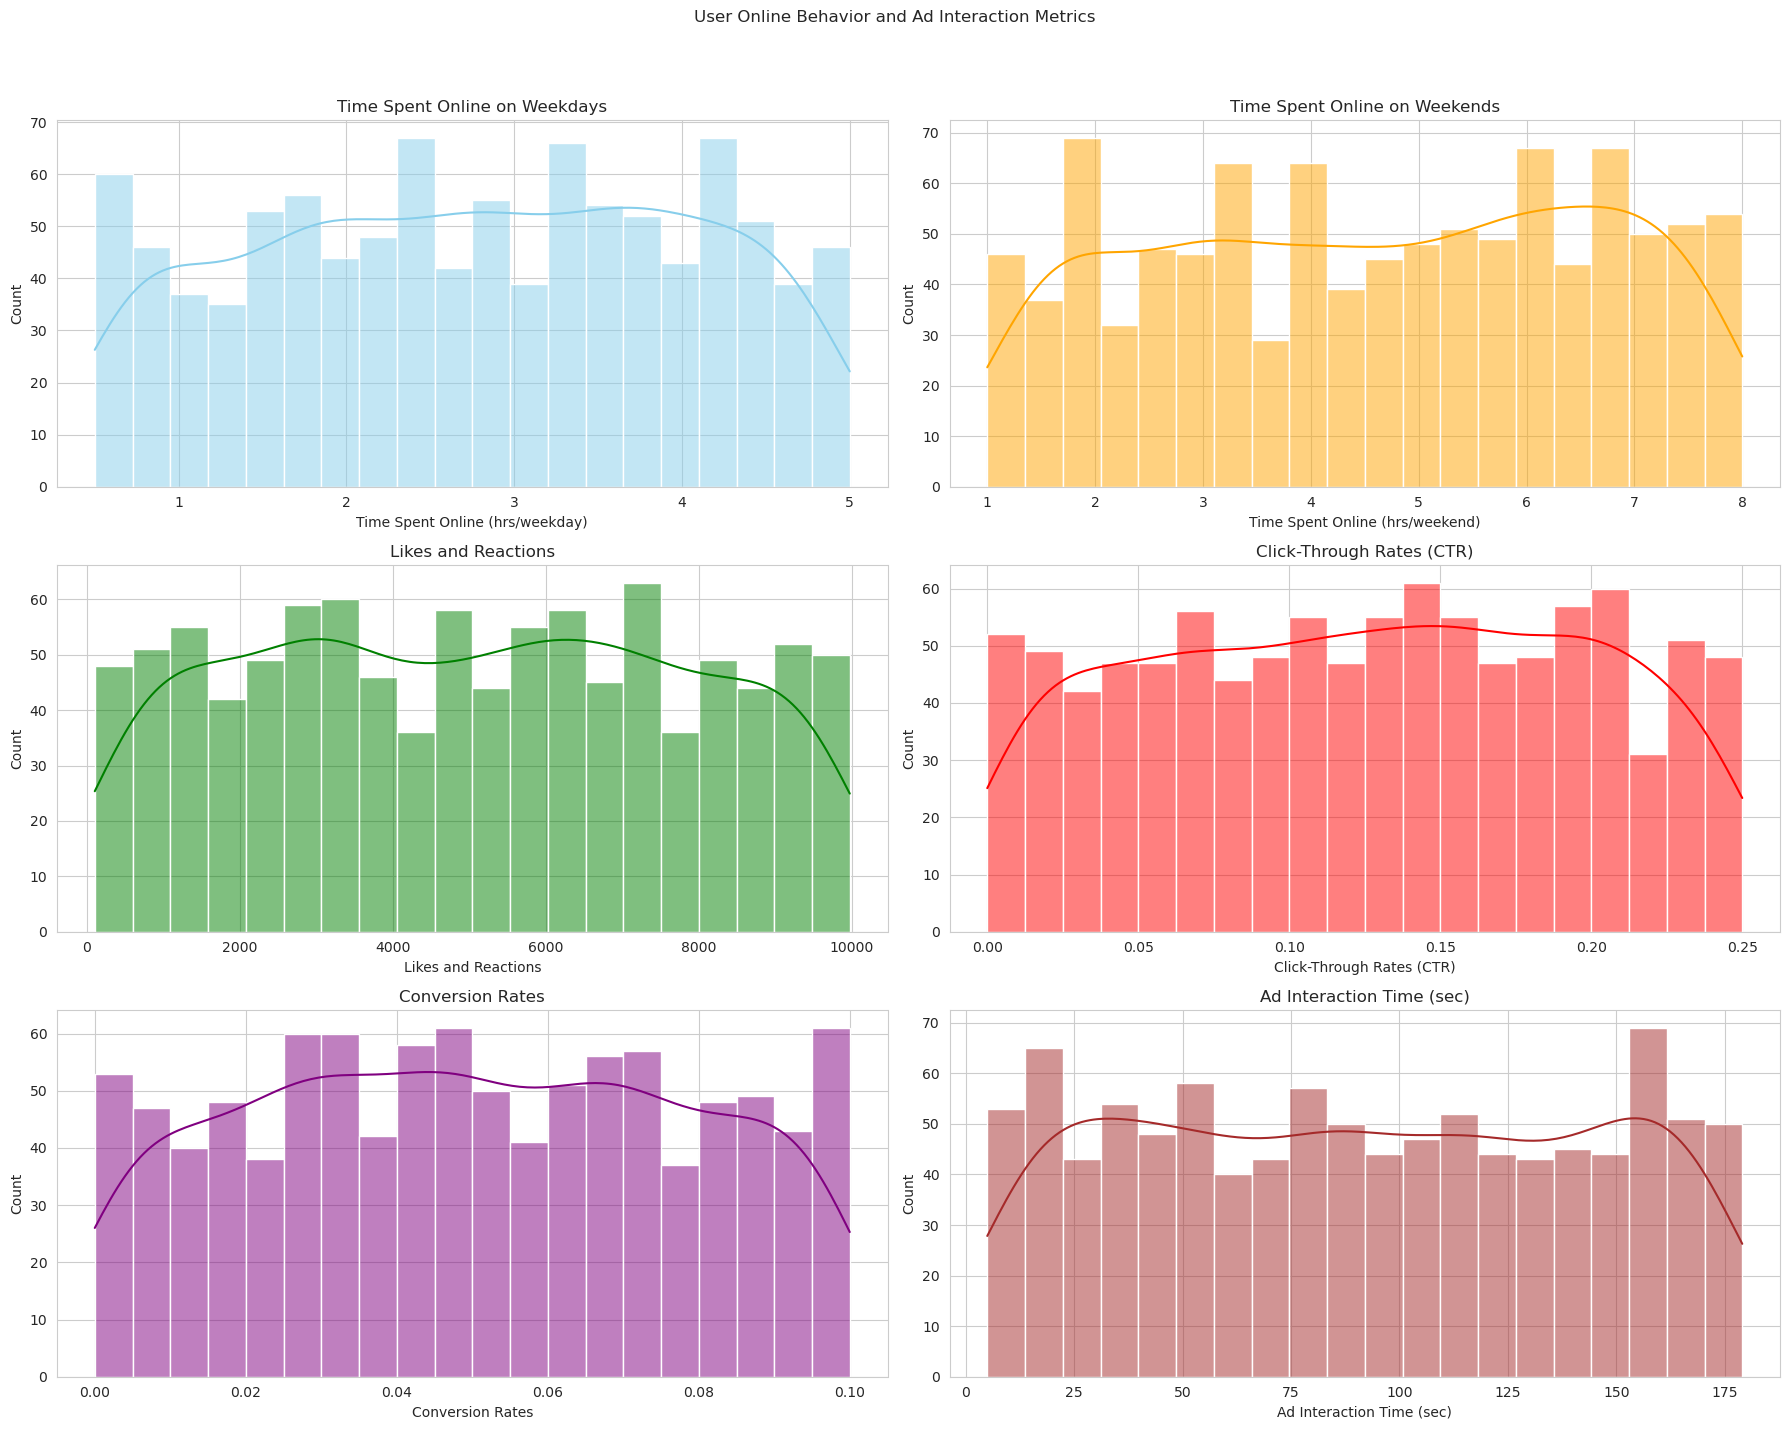

In [6]:
# creating subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# time spent online on weekdays
sns.histplot(ax=axes[0, 0], x='Time Spent Online (hrs/weekday)', data=data, bins=20, kde=True, color='skyblue')
axes[0, 0].set_title('Time Spent Online on Weekdays')

# time spent online on weekends
sns.histplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekend)', data=data, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends')

# likes and reactions
sns.histplot(ax=axes[1, 0], x='Likes and Reactions', data=data, bins=20, kde=True, color='green')
axes[1, 0].set_title('Likes and Reactions')

# click-through rates
sns.histplot(ax=axes[1, 1], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='red')
axes[1, 1].set_title('Click-Through Rates (CTR)')

# conversion rates
sns.histplot(ax=axes[2, 0], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
axes[2, 0].set_title('Conversion Rates')

# ad interaction time
sns.histplot(ax=axes[2, 1], x='Ad Interaction Time (sec)', data=data, bins=20, kde=True, color='brown')
axes[2, 1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

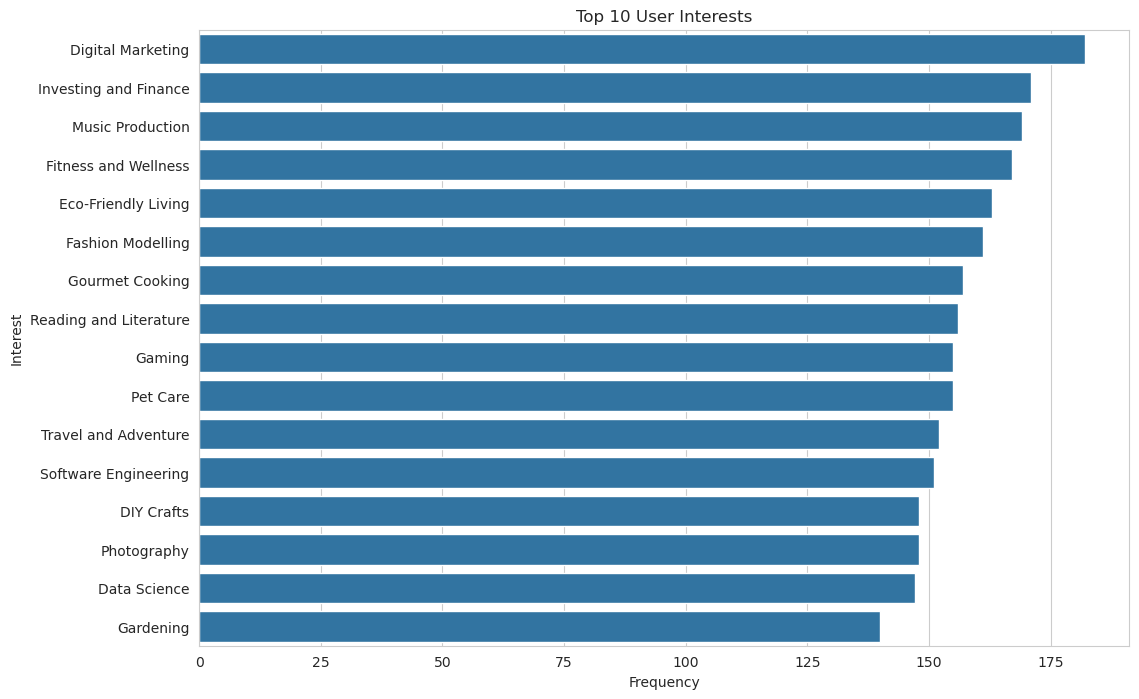

In [7]:
from collections import Counter

# splitting the 'Top Interests' column and creating a list of all interests
interests_list = data['Top Interests'].str.split(', ').sum()

# counting the frequency of each interest
interests_counter = Counter(interests_list)

# converting the counter object to a DataFrame for easier plotting
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

# plotting the most common interests
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Interest', data=interests_df.head(30))
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()

In [8]:
interests_counter

Counter({'Digital Marketing': 182,
         'Investing and Finance': 171,
         'Music Production': 169,
         'Fitness and Wellness': 167,
         'Eco-Friendly Living': 163,
         'Fashion Modelling': 161,
         'Gourmet Cooking': 157,
         'Reading and Literature': 156,
         'Gaming': 155,
         'Pet Care': 155,
         'Travel and Adventure': 152,
         'Software Engineering': 151,
         'DIY Crafts': 148,
         'Photography': 148,
         'Data Science': 147,
         'Gardening': 140})

## Model Selection and Building

In [9]:
# Import additional required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt

In [10]:
# Prepare the data for clustering
# Select numerical features for clustering
numeric_features = [
    'Time Spent Online (hrs/weekday)',
    'Time Spent Online (hrs/weekend)',
    'Likes and Reactions',
    'Click-Through Rates (CTR)',
    'Conversion Rates',
    'Ad Interaction Time (sec)'
]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_features])

In [11]:
# 1. Elbow Method
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

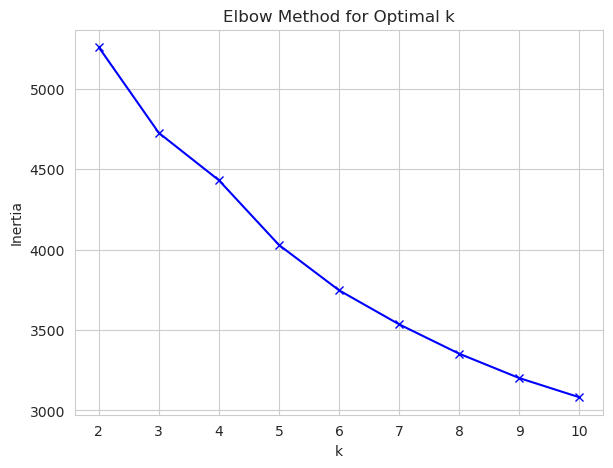

In [12]:
# Plot Elbow Curve
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

Text(6, 1.05, 'Elbow Point: 6')

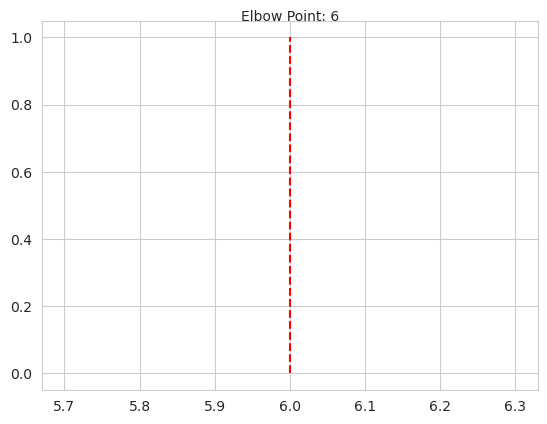

In [13]:
# Find the elbow point
kl = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
plt.text(kl.elbow, plt.ylim()[1], f'Elbow Point: {kl.elbow}', horizontalalignment='center')


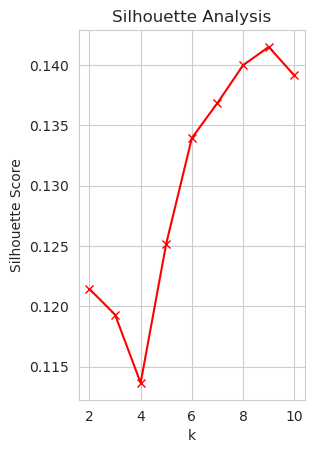

In [14]:
# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

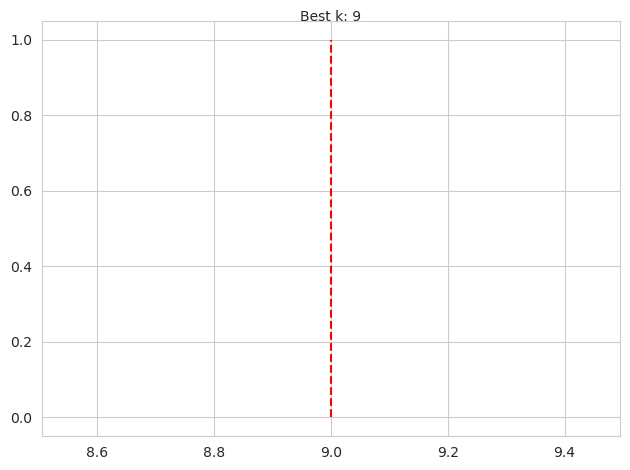

In [15]:
# Find the best silhouette score
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
plt.vlines(best_k_silhouette, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
plt.text(best_k_silhouette, plt.ylim()[1], f'Best k: {best_k_silhouette}', horizontalalignment='center')

plt.tight_layout()
plt.show()

In [16]:
# Print the results
print("\nCluster Analysis Results:")
print(f"Elbow Method suggests {kl.elbow} clusters")
print(f"Silhouette Analysis suggests {best_k_silhouette} clusters")


Cluster Analysis Results:
Elbow Method suggests 6 clusters
Silhouette Analysis suggests 9 clusters


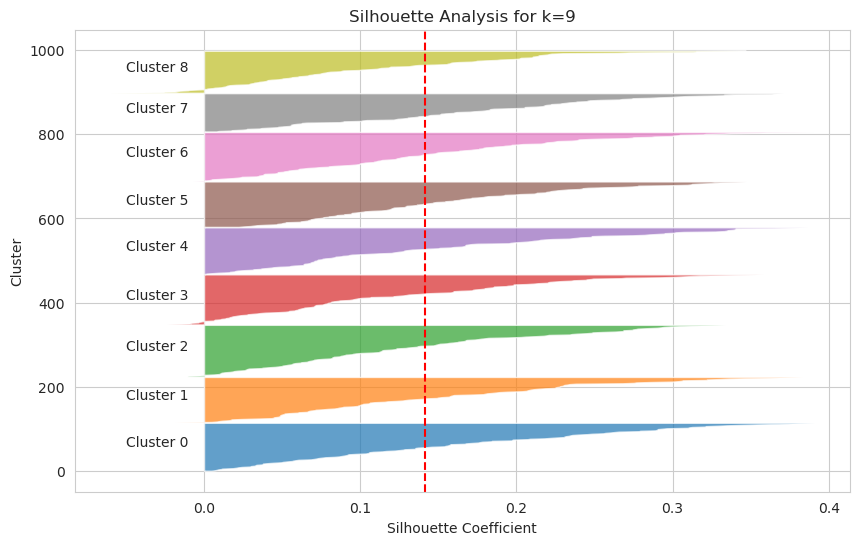

In [17]:
# Additional visualization: Silhouette Analysis for the suggested number of clusters
from sklearn.metrics import silhouette_samples

# Use the better k from silhouette analysis
optimal_k = best_k_silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0

for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals),
             f'Cluster {i}')
    y_lower = y_upper

plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
plt.title(f"Silhouette Analysis for k={optimal_k}")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

In [18]:
# Print detailed cluster statistics
print("\nDetailed Cluster Statistics:")
print(f"Average Silhouette Score: {np.mean(silhouette_vals):.3f}")
for i in range(optimal_k):
    cluster_size = np.sum(cluster_labels == i)
    cluster_silhouette = np.mean(silhouette_vals[cluster_labels == i])
    print(f"\nCluster {i}:")
    print(f"Size: {cluster_size} samples ({cluster_size/len(cluster_labels)*100:.1f}%)")
    print(f"Average Silhouette Score: {cluster_silhouette:.3f}")


Detailed Cluster Statistics:
Average Silhouette Score: 0.142

Cluster 0:
Size: 115 samples (11.5%)
Average Silhouette Score: 0.159

Cluster 1:
Size: 109 samples (10.9%)
Average Silhouette Score: 0.148

Cluster 2:
Size: 124 samples (12.4%)
Average Silhouette Score: 0.130

Cluster 3:
Size: 120 samples (12.0%)
Average Silhouette Score: 0.119

Cluster 4:
Size: 112 samples (11.2%)
Average Silhouette Score: 0.152

Cluster 5:
Size: 109 samples (10.9%)
Average Silhouette Score: 0.153

Cluster 6:
Size: 118 samples (11.8%)
Average Silhouette Score: 0.144

Cluster 7:
Size: 92 samples (9.2%)
Average Silhouette Score: 0.167

Cluster 8:
Size: 101 samples (10.1%)
Average Silhouette Score: 0.105


> After seeing results I found 5 clusters are ideal. So going with that now.

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# selecting features for clustering
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

# separating the features we want to consider for clustering
X = data[features]

# defining preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
data['Cluster'] = cluster_labels

In [20]:
data.head(3)

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,2
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,1
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,0


In [21]:
# computing the mean values of numerical features for each cluster
cluster_means = data.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

cluster_means

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Age,Gender,Income Level
Cluster,,,,,,,
0,3.911111,5.212963,2409.620370,0.149588,25-34,Female,80k-100k
1,1.559394,6.002424,5005.121212,0.179836,35-44,Male,80k-100k
2,3.019737,2.584211,6861.587719,0.170614,25-34,Male,20k-40k
3,3.080882,5.774510,7457.602941,0.067971,25-34,Female,100k+
4,1.809626,3.839572,3021.219251,0.056594,45-54,Female,0-20k


In [22]:
## Visualisations after clustering to have detalied information

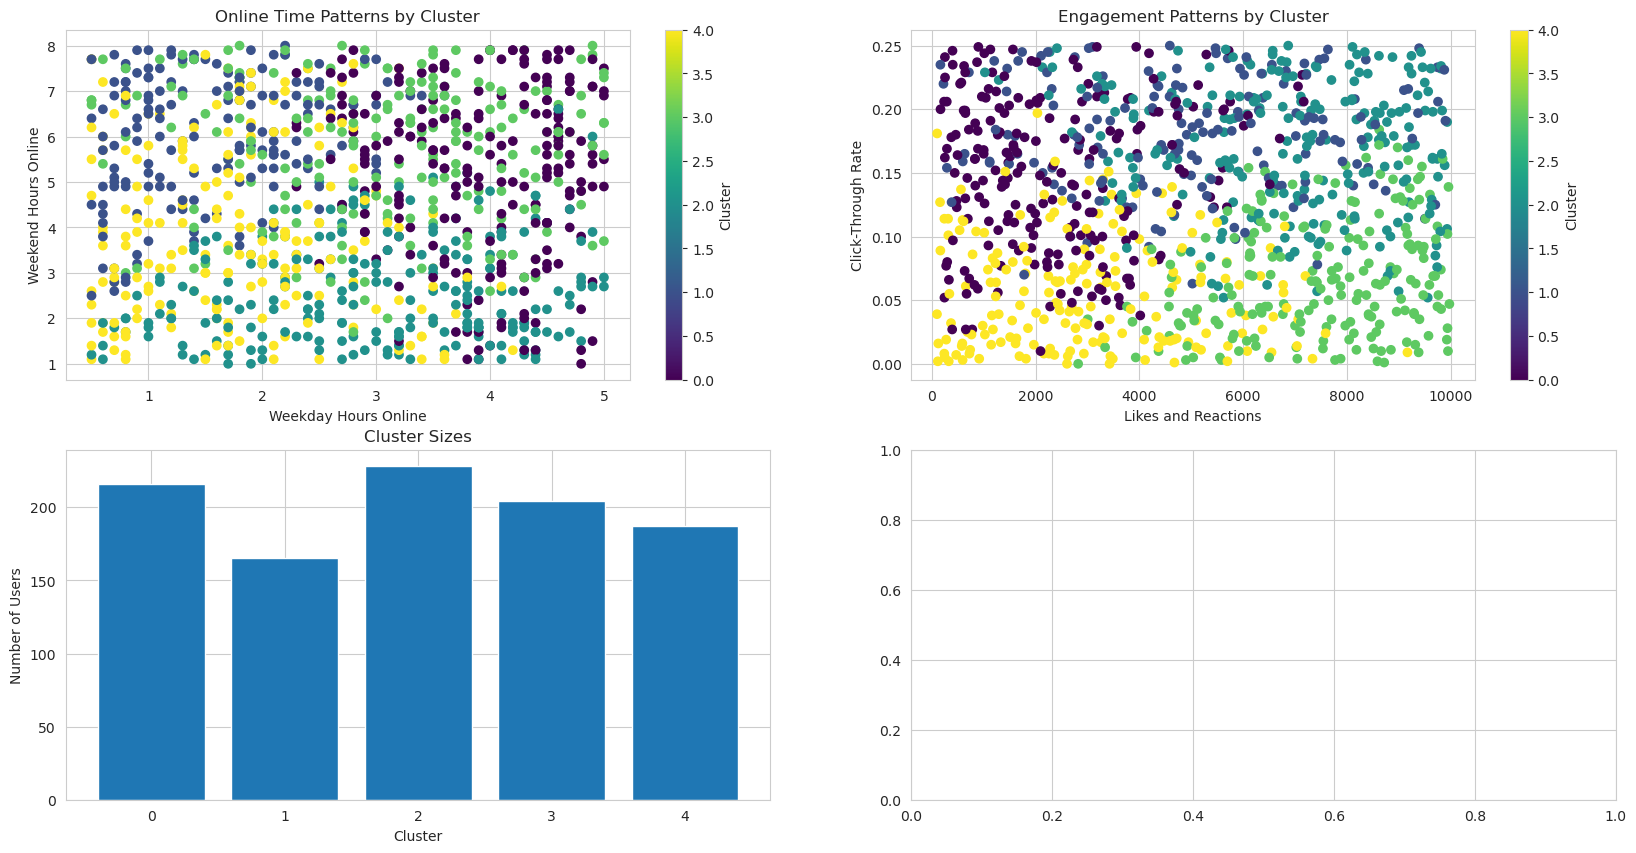

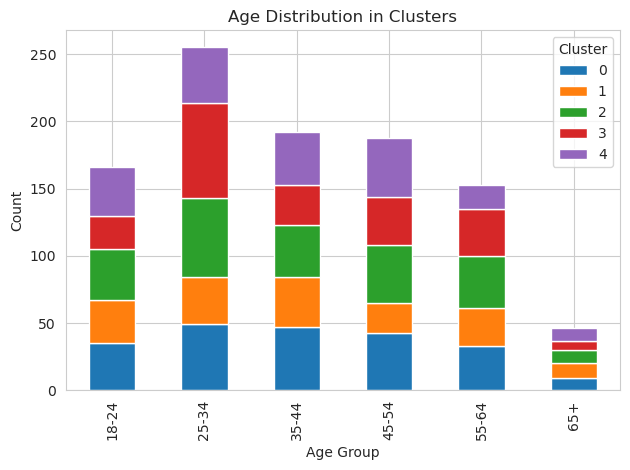

In [23]:
# Create visualizations for the 5 clusters
plt.figure(figsize=(20, 10))

# 1. Time Spent Online Pattern
plt.subplot(2, 2, 1)
plt.scatter(data['Time Spent Online (hrs/weekday)'], 
           data['Time Spent Online (hrs/weekend)'],
           c=data['Cluster'], 
           cmap='viridis')
plt.xlabel('Weekday Hours Online')
plt.ylabel('Weekend Hours Online')
plt.title('Online Time Patterns by Cluster')
plt.colorbar(label='Cluster')

# 2. Engagement Pattern
plt.subplot(2, 2, 2)
plt.scatter(data['Likes and Reactions'], 
           data['Click-Through Rates (CTR)'],
           c=data['Cluster'], 
           cmap='viridis')
plt.xlabel('Likes and Reactions')
plt.ylabel('Click-Through Rate')
plt.title('Engagement Patterns by Cluster')
plt.colorbar(label='Cluster')

# 3. Cluster Sizes
plt.subplot(2, 2, 3)
cluster_sizes = data['Cluster'].value_counts().sort_index()
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('Cluster Sizes')

# 4. Age Distribution in Clusters
plt.subplot(2, 2, 4)
age_cluster = pd.crosstab(data['Age'], data['Cluster'])
age_cluster.plot(kind='bar', stacked=True)
plt.title('Age Distribution in Clusters')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

In [24]:
# Print cluster profiles
print("\nCluster Profiles:")
for cluster in range(5):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster} Profile:")
    print(f"Size: {len(cluster_data)} users ({len(cluster_data)/len(data)*100:.1f}%)")
    print("\nKey Characteristics:")
    print(f"- Most common age group: {cluster_data['Age'].mode().iloc[0]}")
    print(f"- Predominant gender: {cluster_data['Gender'].mode().iloc[0]}")
    print(f"- Typical income level: {cluster_data['Income Level'].mode().iloc[0]}")
    print(f"- Average weekday online time: {cluster_data['Time Spent Online (hrs/weekday)'].mean():.1f} hours")
    print(f"- Average weekend online time: {cluster_data['Time Spent Online (hrs/weekend)'].mean():.1f} hours")
    print(f"- Average CTR: {cluster_data['Click-Through Rates (CTR)'].mean():.3f}")
    print(f"- Average likes: {cluster_data['Likes and Reactions'].mean():.0f}")


Cluster Profiles:

Cluster 0 Profile:
Size: 216 users (21.6%)

Key Characteristics:
- Most common age group: 25-34
- Predominant gender: Female
- Typical income level: 80k-100k
- Average weekday online time: 3.9 hours
- Average weekend online time: 5.2 hours
- Average CTR: 0.150
- Average likes: 2410

Cluster 1 Profile:
Size: 165 users (16.5%)

Key Characteristics:
- Most common age group: 35-44
- Predominant gender: Male
- Typical income level: 80k-100k
- Average weekday online time: 1.6 hours
- Average weekend online time: 6.0 hours
- Average CTR: 0.180
- Average likes: 5005

Cluster 2 Profile:
Size: 228 users (22.8%)

Key Characteristics:
- Most common age group: 25-34
- Predominant gender: Male
- Typical income level: 20k-40k
- Average weekday online time: 3.0 hours
- Average weekend online time: 2.6 hours
- Average CTR: 0.171
- Average likes: 6862

Cluster 3 Profile:
Size: 204 users (20.4%)

Key Characteristics:
- Most common age group: 25-34
- Predominant gender: Female
- Typica

In [29]:
# Create a summary table of cluster characteristics
summary_table = pd.DataFrame({
    'Cluster Size': cluster_sizes,
    'Primary Age Group': [data[data['Cluster'] == i]['Age'].mode().iloc[0] for i in range(5)],
    'Primary Gender': [data[data['Cluster'] == i]['Gender'].mode().iloc[0] for i in range(5)],
    'Primary Income': [data[data['Cluster'] == i]['Income Level'].mode().iloc[0] for i in range(5)],
    'Avg Weekday Hours': [data[data['Cluster'] == i]['Time Spent Online (hrs/weekday)'].mean() for i in range(5)],
    'Avg Weekend Hours': [data[data['Cluster'] == i]['Time Spent Online (hrs/weekend)'].mean() for i in range(5)],
    'Avg CTR': [data[data['Cluster'] == i]['Click-Through Rates (CTR)'].mean() for i in range(5)],
    'Avg Likes': [data[data['Cluster'] == i]['Likes and Reactions'].mean() for i in range(5)]
})

print("\nCluster Summary Table:")
summary_table.round(2)



Cluster Summary Table:


,Cluster Size,Primary Age Group,Primary Gender,Primary Income,Avg Weekday Hours,Avg Weekend Hours,Avg CTR,Avg Likes
Cluster,,,,,,,,
0,216,25-34,Female,80k-100k,3.91,5.21,0.15,2409.62
1,165,35-44,Male,80k-100k,1.56,6.00,0.18,5005.12
2,228,25-34,Male,20k-40k,3.02,2.58,0.17,6861.59
3,204,25-34,Female,100k+,3.08,5.77,0.07,7457.60
4,187,45-54,Female,0-20k,1.81,3.84,0.06,3021.22


In [26]:
# Suggest cluster names based on characteristics
print("\nSuggested Cluster Names:")
for cluster in range(5):
    profile = cluster_means.loc[cluster]
    
    # Determine distinctive characteristics
    if profile['Click-Through Rates (CTR)'] > 0.15:
        engagement = "High-Engagement"
    elif profile['Click-Through Rates (CTR)'] < 0.07:
        engagement = "Passive"
    else:
        engagement = "Moderate-Engagement"
        
    if profile['Likes and Reactions'] > 6000:
        activity = "Super-Active"
    elif profile['Likes and Reactions'] < 3000:
        activity = "Low-Activity"
    else:
        activity = "Active"
        
    print(f"Cluster {cluster}: {engagement} {activity} {profile['Age']} {profile['Gender']}s")


Suggested Cluster Names:
Cluster 0: Moderate-Engagement Low-Activity 25-34 Females
Cluster 1: High-Engagement Active 35-44 Males
Cluster 2: High-Engagement Super-Active 25-34 Males
Cluster 3: Passive Super-Active 25-34 Females
Cluster 4: Passive Active 45-54 Females


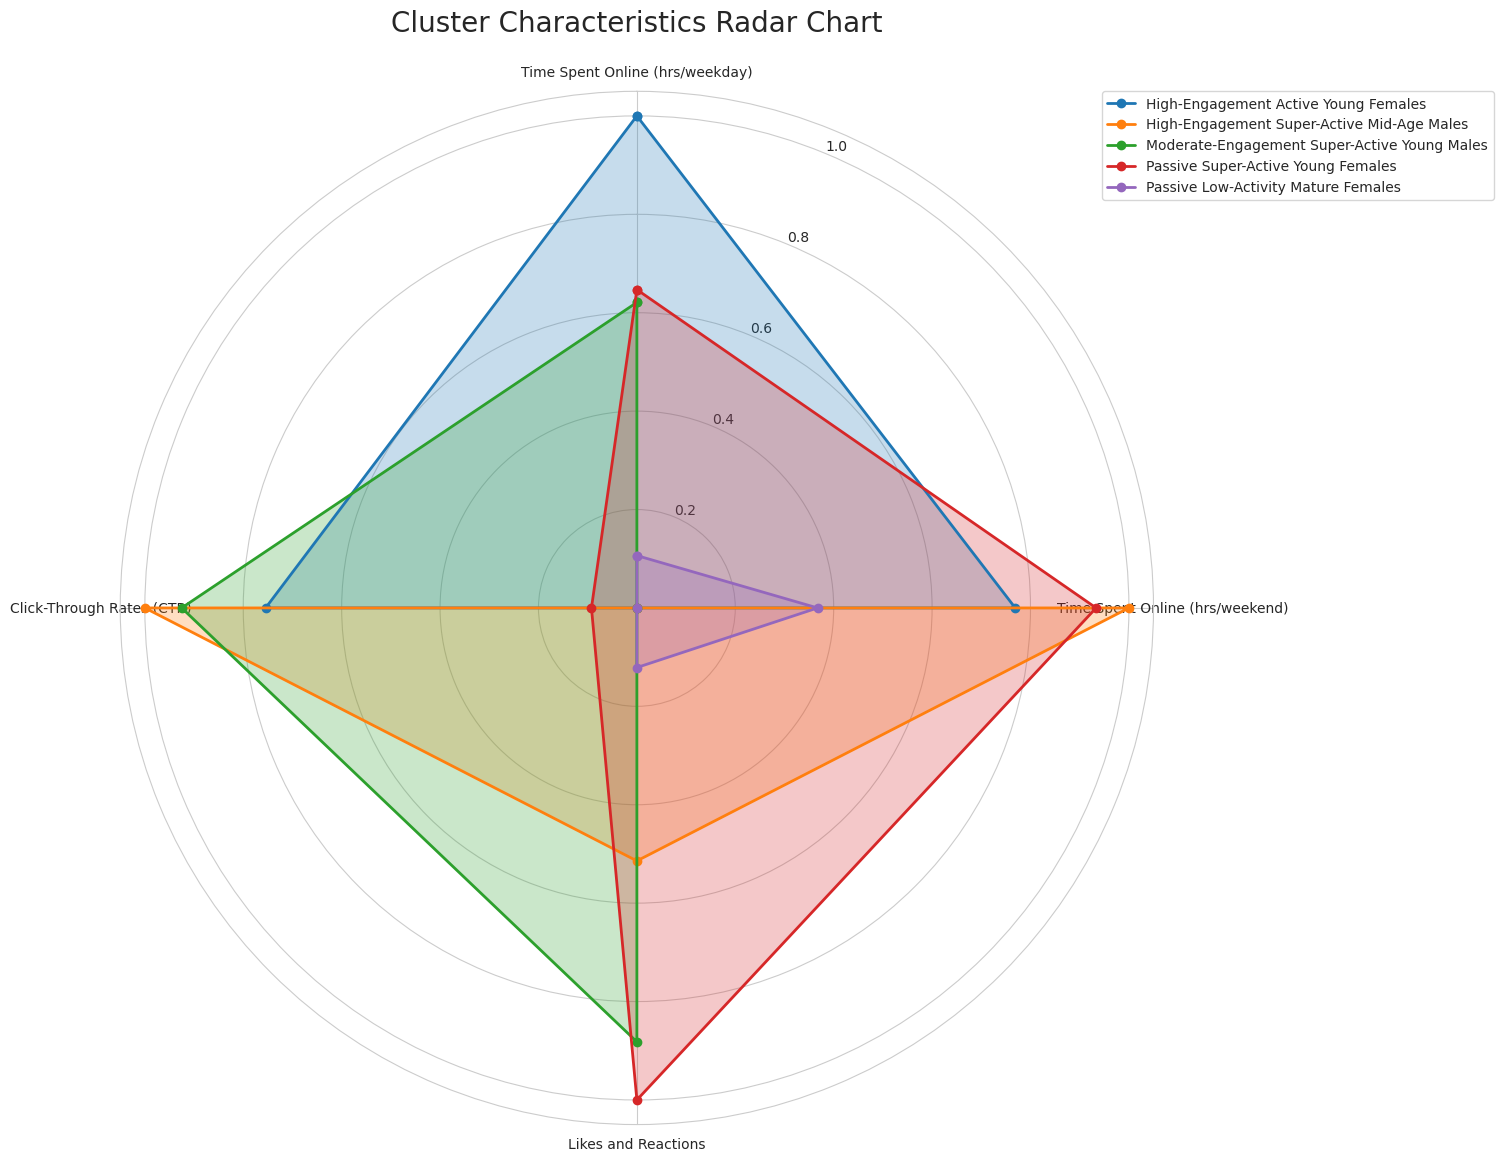

In [27]:
# Define cluster names based on characteristics
cluster_names = [
    "High-Engagement Active Young Females",
    "High-Engagement Super-Active Mid-Age Males",
    "Moderate-Engagement Super-Active Young Males",
    "Passive Super-Active Young Females",
    "Passive Low-Activity Mature Females"
]

# Select features for the radar chart
features = ['Time Spent Online (hrs/weekday)', 
           'Time Spent Online (hrs/weekend)',
           'Likes and Reactions',
           'Click-Through Rates (CTR)']
#,'Conversion Rates','Ad Interaction Time (sec)']

# Normalize the values for better visualization
def normalize_values(df):
    return (df - df.min()) / (df.max() - df.min())

# Get normalized values
normalized_values = normalize_values(cluster_means[features])

# Set up the angles for the radar chart
angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)

# Close the plot by appending the first value to the end
angles = np.concatenate((angles, [angles[0]]))

# Create the plot
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection='polar'))

# Plot data
for idx, cluster in enumerate(normalized_values.index):
    values = normalized_values.loc[cluster].values
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=cluster_names[idx])
    ax.fill(angles, values, alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, size=10)

# Add legend
plt.legend(bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=0., fontsize=10)

plt.title('Cluster Characteristics Radar Chart', size=20, y=1.05)
plt.tight_layout()
plt.show()

In [28]:
# Print cluster insights
print("\nCluster Insights:")
for i, name in enumerate(cluster_names):
    print(f"\n{name}:")
    cluster_data = normalized_values.iloc[i]
    top_features = cluster_data.nlargest(2)
    print(f"Strongest characteristics:")
    for feat, val in top_features.items():
        print(f"- {feat}: {cluster_means.iloc[i][feat]:.2f} (normalized: {val:.2f})")


Cluster Insights:

High-Engagement Active Young Females:
Strongest characteristics:
- Time Spent Online (hrs/weekday): 3.91 (normalized: 1.00)
- Time Spent Online (hrs/weekend): 5.21 (normalized: 0.77)

High-Engagement Super-Active Mid-Age Males:
Strongest characteristics:
- Time Spent Online (hrs/weekend): 6.00 (normalized: 1.00)
- Click-Through Rates (CTR): 0.18 (normalized: 1.00)

Moderate-Engagement Super-Active Young Males:
Strongest characteristics:
- Click-Through Rates (CTR): 0.17 (normalized: 0.93)
- Likes and Reactions: 6861.59 (normalized: 0.88)

Passive Super-Active Young Females:
Strongest characteristics:
- Likes and Reactions: 7457.60 (normalized: 1.00)
- Time Spent Online (hrs/weekend): 5.77 (normalized: 0.93)

Passive Low-Activity Mature Females:
Strongest characteristics:
- Time Spent Online (hrs/weekend): 3.84 (normalized: 0.37)
- Likes and Reactions: 3021.22 (normalized: 0.12)


## We Meet Again!!